In [ ]:
# 데이터 수집, 준비, 탐색
from keras.datasets import mnist
(X_train_0, Y_train_0), (X_test_0, Y_test_0) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("학습 데이터 수 : %d" % (X_train_0.shape[0]))
print("평가 데이터 수 : %d" % (X_test_0.shape[0]))


학습 데이터 수 : 60000
평가 데이터 수 : 10000


In [ ]:
import matplotlib.pyplot as plt


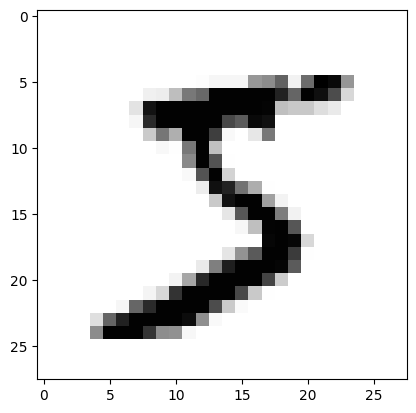

In [ ]:
plt.imshow(X_train_0[0], cmap='Greys')
plt.show()


In [ ]:
import sys

for x in X_train_0[0]:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')


   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

In [ ]:
from tensorflow.python.keras.utils import np_utils


In [ ]:
X_train = X_train_0.reshape(X_train_0.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test_0.reshape(X_test_0.shape[0], 28, 28, 1).astype('float32') / 255


In [ ]:
Y_train = np_utils.to_categorical(Y_train_0, 10)
Y_test = np_utils.to_categorical(Y_test_0, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os  # 모델을 저장할 디렉터리 확인 및 만들기


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [ ]:
MODEL_DIR = '/content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [ ]:
modelpath = "/content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])



Epoch 1: val_loss improved from inf to 0.05674, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/01-0.0567.keras

Epoch 2: val_loss improved from 0.05674 to 0.03946, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/02-0.0395.keras

Epoch 3: val_loss improved from 0.03946 to 0.03207, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/03-0.0321.keras

Epoch 4: val_loss improved from 0.03207 to 0.03048, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/04-0.0305.keras

Epoch 5: val_loss improved from 0.03048 to 0.02795, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/05-0.0280.keras

Epoch 6: val_loss did not improve from 0.02795

Epoch 7: val_loss did not improve from 0.02795

Epoch 8: val_loss improved from 0.02795 to 0.02686, saving model to /content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/model/08-0.0269.keras

Epoch 9: val_loss i

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9899 - loss: 0.0369

 Test Accuracy: 0.9916


In [ ]:
import numpy as np

# 평가 데이터셋의 손실
y_vloss = history.history['val_loss']

# 학습 데이터셋의 손실
y_loss = history.history['loss']


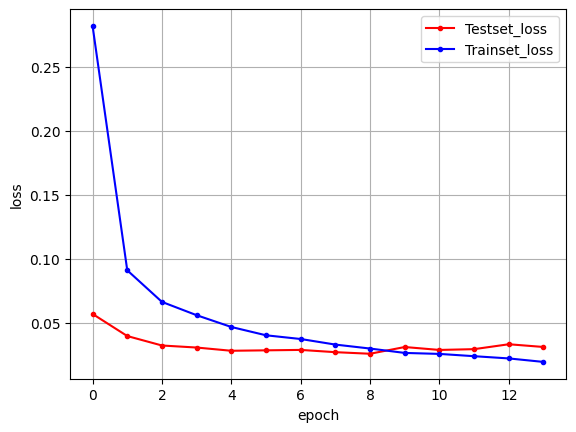

In [ ]:
x_len = np.arange(len(y_loss))  # 에포크 수만큼 x축 생성

# 검증 데이터셋의 손실 그래프 (빨간색)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')

# 학습 데이터셋의 손실 그래프 (파란색)
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')  # 범례 위치 설정
plt.grid()                     # 그리드 추가
plt.xlabel('epoch')            # x축 레이블
plt.ylabel('loss')             # y축 레이블
plt.show()                     # 그래프 출력


In [ ]:
test_num = X_train[0].reshape(-1, 28, 28, 1)


In [ ]:
prediction = model.predict(test_num)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [ ]:
print('입력한 이미지는 %f 확률로 %d 입니다!' % (prediction[0, prediction.argmax()], prediction.argmax()))


입력한 이미지는 0.998911 확률로 5 입니다!


In [ ]:
from PIL import Image


In [ ]:
test = Image.open('/content/drive/MyDrive/data/숫자 손글씨 이미지 데이터/test7.jpg')
test.mode


FileNotFoundError: [Errno 2] No such file or directory: './14장_data/test7.jpg'

In [ ]:
test_gray = test.convert("L")
test_gray.mode


In [ ]:
test_gray  # 확인용 이미지 출력


In [ ]:
test_gray = test_gray.resize((28, 28))


In [ ]:
test_data = np.asarray(test_gray)

for x in test_data:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')


In [ ]:
plt.imshow(test_data, cmap='Greys')
plt.show()


In [ ]:
test_data_v = []

for i in range(28):
    row = []
    for j in range(28):
        row.append(255 - test_data[i][j])  # 반전
    test_data_v.append(row)


In [ ]:
for x in test_data_v:
    for i in x:
        sys.stdout.write('%4d' % i)
    sys.stdout.write('\n')


In [ ]:
plt.imshow(test_data_v, cmap='Greys')
plt.show()

In [ ]:
test_data_v2 = np.asarray(test_data_v)                          # 리스트를 배열로 변환
test_data_v2 = test_data_v2.reshape(-1, 28, 28, 1).astype('float32') / 255

test_data_v2.shape

In [ ]:
prediction_new = model.predict(test_data_v2)
prediction_new

In [ ]:
test_class = prediction_new.argmax()

print('입력한 이미지는 %f 확률로 %d 입니다!' % (prediction_new[0, test_class]*100, test_class))
